### 复现一下感知机的运行流程
1. 单层单输出感知机
2. 多层多输出感知机

In [1]:
import torch

#### 单层感知机

In [257]:
x = torch.rand(10,1)
x.t()

tensor([[0.4033, 0.2781, 0.4379, 0.1492, 0.6466, 0.3652, 0.8431, 0.8114, 0.8484,
         0.1692]])

In [258]:
w = torch.rand(1,10,requires_grad=True)
w

tensor([[0.4367, 0.2900, 0.1442, 0.9143, 0.4829, 0.8900, 0.6398, 0.5721, 0.7141,
         0.7824]], requires_grad=True)

In [259]:
b = torch.rand(1,requires_grad=True)
b

tensor([0.4315], requires_grad=True)

In [260]:
y = w@x + b
y

tensor([[3.2670]], grad_fn=<AddBackward0>)

In [261]:
table = torch.tensor(3.)
loss = torch.norm(y-table,2).pow(2)
loss

tensor(0.0713, grad_fn=<PowBackward0>)

In [262]:
# 这里再一次注意，反向求导的必须是一个值，而不是一个向量或张量，注意要加 retain_graph
torch.autograd.grad(loss,w,retain_graph=True)

(tensor([[0.2154, 0.1485, 0.2339, 0.0797, 0.3453, 0.1951, 0.4503, 0.4334, 0.4531,
          0.0903]]),)

In [263]:
# 再次注意，上面一句只是返回loss对w的偏导值，并没有进行反向传播
loss.backward(retain_graph=True)

In [264]:
w = w - 0.01* torch.autograd.grad(loss,w,retain_graph=True)[0]
b = b - 0.01* torch.autograd.grad(loss,b,retain_graph=True)[0]
y = w@x + b
loss = torch.norm(y-table,2).pow(2)
loss,y,table

(tensor(0.0600, grad_fn=<PowBackward0>),
 tensor([[3.2450]], grad_fn=<AddBackward0>),
 tensor(3.))

a = torch.rand（10，requires_grad = True）#a是leaf变量  
a = torch.rand（10，requires_grad = True）.double（）#a不是leaf变量，因为它是由浮动张量转换为双张量的操作创建的  
a = torch.rand（10）.requires_grad _（）。double（）＃等同于上面的公式：不是leaf变量  
a = torch.rand（10）.double（）#a不需要求导，也没有创建它的操作（由autograd引擎跟踪）。  
a = torch.rand（10）.doube（）.requires_grad_（）#a需要求导并且没有创建它的操作：它是leaf变量并且可以被赋予优化器。  
a = torch.rand（10，requires_grad = True，device =“cuda”）#a需要grad，没有操作创建它：它也是一个叶子变量，可以给一个优化器  

In [273]:
# 这里有个 w --> can't optimize a non-leaf Tensor 的问题
# 应该是上面的运算改变了w的属性
w = torch.rand(1,10,requires_grad=True)
b = torch.rand(1,requires_grad=True)
lable = torch.tensor(3.)
optimizer = torch.optim.Adam([w,b],lr=0.1)
for i in range(100):
    y = w@x + b
    loss = torch.norm(y-lable,2).pow(2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10  == 0 :
        print(loss, y)

tensor(0.0422, grad_fn=<PowBackward0>) tensor([[3.2055]], grad_fn=<AddBackward0>)
tensor(0.0121, grad_fn=<PowBackward0>) tensor([[2.8899]], grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<PowBackward0>) tensor([[2.9752]], grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<PowBackward0>) tensor([[3.0204]], grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<PowBackward0>) tensor([[3.0385]], grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<PowBackward0>) tensor([[3.0153]], grad_fn=<AddBackward0>)
tensor(0.0002, grad_fn=<PowBackward0>) tensor([[2.9870]], grad_fn=<AddBackward0>)
tensor(6.8919e-07, grad_fn=<PowBackward0>) tensor([[2.9992]], grad_fn=<AddBackward0>)
tensor(1.8059e-05, grad_fn=<PowBackward0>) tensor([[3.0042]], grad_fn=<AddBackward0>)
tensor(1.0610e-05, grad_fn=<PowBackward0>) tensor([[2.9967]], grad_fn=<AddBackward0>)


####  多层多输出感知机

In [300]:
w1 = torch.rand(10,10,requires_grad=True)
w2 = torch.rand(10,3,requires_grad=True)
lable = torch.randint(0,10,(3,1),dtype=torch.float)
optimizer = torch.optim.Adam([w1,w2],lr=0.01)

In [306]:
# x 的初始化
x = torch.rand(10,1)
for i in range(100):
    y = w2.t()@(w1@x)
    loss = torch.norm(y-lable,2).pow(2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 50  == 0 :
        print(loss, y.t().data, lable.t())

tensor(3.2404, grad_fn=<PowBackward0>) tensor([[2.8509, 2.1722, 9.5769]]) tensor([[2., 2., 8.]])
tensor(0.0154, grad_fn=<PowBackward0>) tensor([[1.9600, 1.9022, 7.9350]]) tensor([[2., 2., 8.]])


In [309]:
w1.grad

tensor([[ 3.0596e-03,  9.1713e-04,  1.6572e-03,  3.5225e-03,  3.0925e-03,
          2.9327e-03,  3.0412e-03,  3.3715e-03,  2.4686e-03,  3.5134e-03],
        [ 7.2944e-03,  2.1865e-03,  3.9510e-03,  8.3980e-03,  7.3728e-03,
          6.9919e-03,  7.2505e-03,  8.0381e-03,  5.8854e-03,  8.3762e-03],
        [ 4.0788e-03,  1.2226e-03,  2.2093e-03,  4.6959e-03,  4.1226e-03,
          3.9096e-03,  4.0542e-03,  4.4946e-03,  3.2909e-03,  4.6837e-03],
        [ 7.5247e-03,  2.2556e-03,  4.0758e-03,  8.6632e-03,  7.6056e-03,
          7.2127e-03,  7.4794e-03,  8.2919e-03,  6.0712e-03,  8.6407e-03],
        [ 3.0252e-04,  9.0682e-05,  1.6386e-04,  3.4829e-04,  3.0577e-04,
          2.8998e-04,  3.0070e-04,  3.3336e-04,  2.4409e-04,  3.4739e-04],
        [ 7.6883e-03,  2.3046e-03,  4.1644e-03,  8.8515e-03,  7.7709e-03,
          7.3695e-03,  7.6420e-03,  8.4721e-03,  6.2032e-03,  8.8285e-03],
        [-9.2184e-04, -2.7632e-04, -4.9932e-04, -1.0613e-03, -9.3174e-04,
         -8.8361e-04, -9.1628e-0

### 私货，玩点3d显示

In [187]:
import numpy as np

In [241]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)

In [242]:
Z = (X**2 +Y-11)**2 +(X+ Y**2 -7)**2

In [214]:
from matplotlib import pyplot as plt
import matplotlib

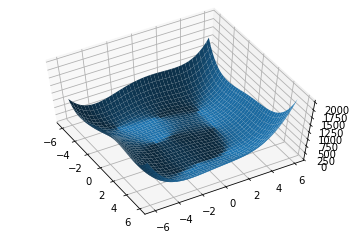

In [255]:
fig = plt.figure('himmelblau')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60,-30)
plt.show()

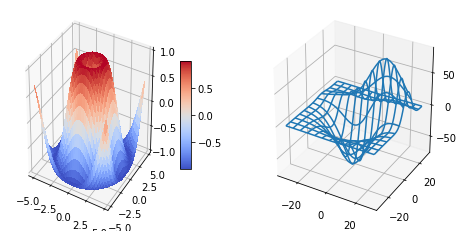

In [235]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()